In [2]:
import os, glob
import numpy as np
import pandas as pd
import math
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
from statsmodels.stats.weightstats import ztest

In [3]:
base_dir = "/data/projects/Enhancer/RECOMB_2024/SNP_data/Consensus_data/"

In [4]:
output_path = "/data/projects/Enhancer/RECOMB_2024/Variant_Analysis/Consensus_data"
if not os.path.exists(output_path):
    os.makedirs(output_path)

In [5]:
def log_oods_ratio(p1,p2):
    term1 = math.log2(p1/(1-p1))
    term2 = math.log2(p2/(1-p2))
    return (term1-term2)
def calculate_diff_probab(p1,p2):
    return((p2-p1)*max(p1,p2))

In [6]:
df_dict = {}
df_list = []
pred_probab = np.load(base_dir+"Prediction_result/pred_results.npy")
print(len(pred_probab))
df = pd.read_csv(base_dir+"/all_data_new.tsv", sep= "\t")
print(df.shape)
Reference_probab = pred_probab[::2]
Alternative_probab = pred_probab[1::2]
df['Ref_probab']=Reference_probab
df['Alt_probab']=Alternative_probab
df['ScoreChange'] = df.apply(lambda row: calculate_diff_probab(row['Ref_probab'], row['Alt_probab']), axis=1)
df['LogOddRatio'] = df.apply(lambda row: log_oods_ratio(row['Ref_probab'], row['Alt_probab']), axis=1)

15477584
(7738792, 10)


In [7]:
df

,index,chr,Enhancer_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
0,0,chr2,236984140-236984339,rs1423429845,236984140,236984141,C,A,CTTCTATTCATGGGCTTTTGTCAAGCTTCCAATTTAGGACTATTAC...,ATTCTATTCATGGGCTTTTGTCAAGCTTCCAATTTAGGACTATTAC...,0.511143,0.480811,-0.015504,0.175103
1,1,chr2,236984140-236984339,rs1192060657,236984152,236984153,G,C,CTTCTATTCATGGGCTTTTGTCAAGCTTCCAATTTAGGACTATTAC...,CTTCTATTCATGCGCTTTTGTCAAGCTTCCAATTTAGGACTATTAC...,0.511143,0.517404,0.003239,-0.036160
2,2,chr2,236984140-236984339,rs1040350809,236984153,236984154,G,A,CTTCTATTCATGGGCTTTTGTCAAGCTTCCAATTTAGGACTATTAC...,CTTCTATTCATGGACTTTTGTCAAGCTTCCAATTTAGGACTATTAC...,0.511143,0.484794,-0.013468,0.152094
3,3,chr2,236984140-236984339,rs1238087442,236984154,236984155,C,T,CTTCTATTCATGGGCTTTTGTCAAGCTTCCAATTTAGGACTATTAC...,CTTCTATTCATGGGTTTTTGTCAAGCTTCCAATTTAGGACTATTAC...,0.511143,0.500728,-0.005323,0.060112
4,4,chr2,236984140-236984339,rs1574804327,236984158,236984159,T,A,CTTCTATTCATGGGCTTTTGTCAAGCTTCCAATTTAGGACTATTAC...,CTTCTATTCATGGGCTTTAGTCAAGCTTCCAATTTAGGACTATTAC...,0.511143,0.491591,-0.009994,0.112843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7738787,7738787,chr5,172241923-172242122,rs1772142686,172242112,172242113,C,A,GGGAGGATCACTAGAGCCTGGGAGATGTAGGCTGCAGTGAGCTGCG...,GGGAGGATCACTAGAGCCTGGGAGATGTAGGCTGCAGTGAGCTGCG...,0.888705,0.862992,-0.022851,0.342229
7738788,7738788,chr5,172241923-172242122,rs1772142740,172242113,172242114,T,A,GGGAGGATCACTAGAGCCTGGGAGATGTAGGCTGCAGTGAGCTGCG...,GGGAGGATCACTAGAGCCTGGGAGATGTAGGCTGCAGTGAGCTGCG...,0.888705,0.880838,-0.006992,0.111371
7738789,7738789,chr5,172241923-172242122,rs140804318,172242118,172242119,C,A,GGGAGGATCACTAGAGCCTGGGAGATGTAGGCTGCAGTGAGCTGCG...,GGGAGGATCACTAGAGCCTGGGAGATGTAGGCTGCAGTGAGCTGCG...,0.888705,0.876987,-0.010414,0.163580
7738790,7738790,chr5,172241923-172242122,rs140804318,172242118,172242119,C,T,GGGAGGATCACTAGAGCCTGGGAGATGTAGGCTGCAGTGAGCTGCG...,GGGAGGATCACTAGAGCCTGGGAGATGTAGGCTGCAGTGAGCTGCG...,0.888705,0.877829,-0.009666,0.152281


In [41]:
#df_interest = df_interest[((df_interest['Ref_probab']>0.5) & (df_interest['Alt_probab']<0.5))|((df_interest['Ref_probab']<0.5) & (df_interest['Alt_probab']>0.5))]
# df_interest = concatenated_df[(concatenated_df['Ref_probab']>0.5)|(concatenated_df['Alt_probab']>0.5)]
# df_interest
filtered_df1 = df[(df['Ref_probab'] >= 0.5) & (df['Alt_probab'] < 0.5)]
#filtered_df2 = df[(df['Ref_probab'] < 0.5) & (df['Alt_probab'] > 0.5)]
df_interest = filtered_df1
df_interest 

,index,chr,Enhancer_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
0,0,chr2,236984140-236984339,rs1423429845,236984140,236984141,C,A,CTTCTATTCATGGGCTTTTGTCAAGCTTCCAATTTAGGACTATTAC...,ATTCTATTCATGGGCTTTTGTCAAGCTTCCAATTTAGGACTATTAC...,0.511143,0.480811,-0.015504,0.175103
2,2,chr2,236984140-236984339,rs1040350809,236984153,236984154,G,A,CTTCTATTCATGGGCTTTTGTCAAGCTTCCAATTTAGGACTATTAC...,CTTCTATTCATGGACTTTTGTCAAGCTTCCAATTTAGGACTATTAC...,0.511143,0.484794,-0.013468,0.152094
4,4,chr2,236984140-236984339,rs1574804327,236984158,236984159,T,A,CTTCTATTCATGGGCTTTTGTCAAGCTTCCAATTTAGGACTATTAC...,CTTCTATTCATGGGCTTTAGTCAAGCTTCCAATTTAGGACTATTAC...,0.511143,0.491591,-0.009994,0.112843
5,5,chr2,236984140-236984339,rs1209533926,236984164,236984165,G,A,CTTCTATTCATGGGCTTTTGTCAAGCTTCCAATTTAGGACTATTAC...,CTTCTATTCATGGGCTTTTGTCAAACTTCCAATTTAGGACTATTAC...,0.511143,0.484547,-0.013594,0.153520
7,7,chr2,236984140-236984339,rs1440819583,236984165,236984166,C,T,CTTCTATTCATGGGCTTTTGTCAAGCTTCCAATTTAGGACTATTAC...,CTTCTATTCATGGGCTTTTGTCAAGTTTCCAATTTAGGACTATTAC...,0.511143,0.489347,-0.011141,0.125799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7738202,7738202,chr5,180271303-180271502,rs561544327,180271430,180271431,C,T,GTGGTTATTGCGGTCACTCAAAGAATACATTGTTATCACTATCTCT...,GTGGTTATTGCGGTCACTCAAAGAATACATTGTTATCACTATCTCT...,0.559976,0.480912,-0.044274,0.457986
7738203,7738203,chr5,180271303-180271502,rs1270125526,180271431,180271432,G,A,GTGGTTATTGCGGTCACTCAAAGAATACATTGTTATCACTATCTCT...,GTGGTTATTGCGGTCACTCAAAGAATACATTGTTATCACTATCTCT...,0.559976,0.460070,-0.055945,0.578699
7738224,7738224,chr5,180271303-180271502,rs961403409,180271484,180271485,C,A,GTGGTTATTGCGGTCACTCAAAGAATACATTGTTATCACTATCTCT...,GTGGTTATTGCGGTCACTCAAAGAATACATTGTTATCACTATCTCT...,0.559976,0.492076,-0.038023,0.393517
7738225,7738225,chr5,180271303-180271502,rs961403409,180271484,180271485,C,T,GTGGTTATTGCGGTCACTCAAAGAATACATTGTTATCACTATCTCT...,GTGGTTATTGCGGTCACTCAAAGAATACATTGTTATCACTATCTCT...,0.559976,0.479685,-0.044961,0.465081


In [59]:
df_interest [['dbsnp_id', 'varinat_start',	'variant_end']].drop_duplicates()

,dbsnp_id,varinat_start,variant_end
6412,rs1218056977,220450305,220450306
17455,rs1667197696,39926824,39926847
26104,rs1665992858,16133983,16133986
33557,rs777818265,12019391,12019391
36914,rs911714771,39081064,39081080
...,...,...,...
7697884,rs1756477261,179300146,179300147
7697938,rs1268176179,179300288,179300289
7710756,rs1761442698,179909980,179909987
7716025,rs1756845043,180500994,180500995


In [42]:
df_interest[['chr','Enhancer_coordinates']].drop_duplicates()

,chr,Enhancer_coordinates
0,chr2,236984140-236984339
168,chr2,67638320-67638519
1327,chr2,118109181-118109380
3504,chr2,181077197-181077396
3912,chr2,102331713-102331912
...,...,...
7734313,chr5,2273393-2273592
7735221,chr5,43014898-43015097
7735666,chr5,43786232-43786431
7736145,chr5,107480404-107480603


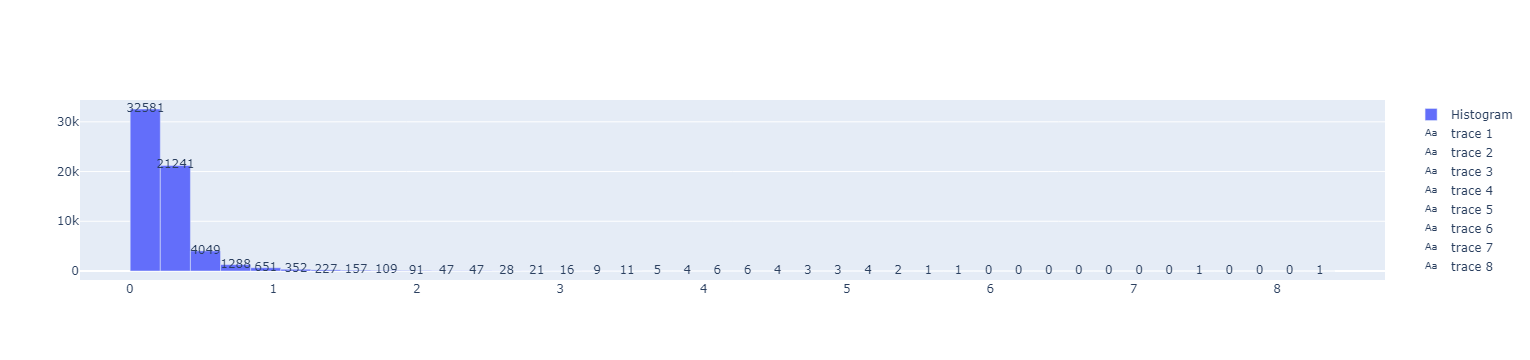

In [43]:
# Plot the figure
counts, bins = np.histogram(df_interest['LogOddRatio'], bins=40)
bin_midpoints = bins[:-1] + np.diff(bins)/2

fig = go.Figure()

fig.add_trace(go.Bar(
    x=bin_midpoints,
    y=counts,
    width=np.diff(bins), # makes bars have correct widths
    name='Histogram'
))
# add text labels for counts
for i in range(len(counts)):
    fig.add_trace(go.Scatter(
        x=[bin_midpoints[i]],
        y=[counts[i]],
        text=[str(counts[i])],
        mode='text',
    ))

fig.show()

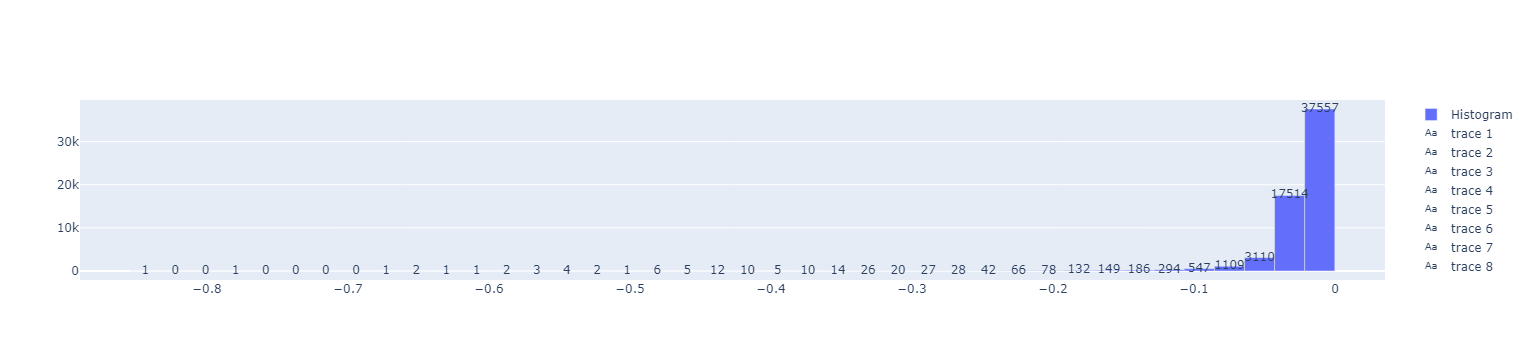

In [44]:
# Plot the figure
counts, bins = np.histogram(df_interest['ScoreChange'], bins=40)
bin_midpoints = bins[:-1] + np.diff(bins)/2

fig = go.Figure()

fig.add_trace(go.Bar(
    x=bin_midpoints,
    y=counts,
    width=np.diff(bins), # makes bars have correct widths
    name='Histogram'
))
# add text labels for counts
for i in range(len(counts)):
    fig.add_trace(go.Scatter(
        x=[bin_midpoints[i]],
        y=[counts[i]],
        text=[str(counts[i])],
        mode='text',
    ))

fig.show()

In [45]:
df_interest = df_interest[(df_interest['ScoreChange']>0.10)|(df_interest['ScoreChange']<-0.10)]
df_interest

,index,chr,Enhancer_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
6412,6412,chr2,220450184-220450383,rs1218056977,220450305,220450306,G,GTAATTTTTCTTCTACAGATAGTTTTCTTCTACAGATAG,ATCTCAATCTCCTGACCTCGTGATTCACCTGCTTTGGCCTCCCAAA...,ATCTCAATCTCCTGACCTCGTGATTCACCTGCTTTGGCCTCCCAAA...,0.699034,0.354988,-0.240500,2.077320
17455,17455,chr2,39926648-39926847,rs1667197696,39926824,39926847,ATCCCTAGGCTCAAGAAAGCAGA,A,TTTCTTGATGCTTCAGGAAGTCCCAGAAGCTCCACTGACCCTGTGA...,TTTCTTGATGCTTCAGGAAGTCCCAGAAGCTCCACTGACCCTGTGA...,0.656260,0.497273,-0.104337,0.948687
26104,26104,chr2,16133874-16134073,rs1665992858,16133983,16133986,GCG,NaN,AACCTGGGAGGCGGAGCTTGCAGTGAGTCGAGATCGCGCCACTGCA...,AACCTGGGAGGCGGAGCTTGCAGTGAGTCGAGATCGCGCCACTGCA...,0.525980,0.318206,-0.109285,1.249432
33557,33557,chr2,12019294-12019493,rs777818265,12019391,12019391,.,CTTGATATATTC,GCCCTTTAAATTCCACCTTACCCCACCCAACAAGATTTTAAGCTTT...,GCCCTTTAAATTCCACCTTACCCCACCCAACAAGATTTTAAGCTTT...,0.573466,0.396035,-0.101750,1.035883
36914,36914,chr2,39080969-39081168,rs911714771,39081064,39081080,CAGCTACTCAGGAAGC,C,GAGCCTAGGAGTTCAAGACCTGCCTGGGCAACAAAGTGAGACCTTG...,GAGCCTAGGAGTTCAAGACCTGCCTGGGCAACAAAGTGAGACCTTG...,0.758128,0.395945,-0.274581,2.257577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7697884,7697884,chr5,179300091-179300290,rs1756477261,179300146,179300147,G,A,CTCAAAAAAAAAAAAAAAAAAAGAAGAATCCTTGCCATTACACTGT...,CTCAAAAAAAAAAAAAAAAAAAGAAGAATCCTTGCCATTACACTGT...,0.623221,0.414875,-0.129846,1.222097
7697938,7697938,chr5,179300091-179300290,rs1268176179,179300288,179300289,C,T,CTCAAAAAAAAAAAAAAAAAAAGAAGAATCCTTGCCATTACACTGT...,CTCAAAAAAAAAAAAAAAAAAAGAAGAATCCTTGCCATTACACTGT...,0.623221,0.444788,-0.111204,1.045952
7710756,7710756,chr5,179909950-179910149,rs1761442698,179909980,179909987,TTCATTC,TTC,GTTCACCCACGTTGTAGCACGTATTGATGCTTCATTCCTCCTTATG...,GTTCACCCACGTTGTAGCACGTATTGATGCTTCCTCCTTATGGCTG...,0.686426,0.484514,-0.138598,1.219693
7716025,7716025,chr5,180500967-180501166,rs1756845043,180500994,180500995,G,A,AGGAACAGCATATTGGGAACAACATGGGCTGTGGAGCATAAGACAC...,AGGAACAGCATATTGGGAACAACATGGACTGTGGAGCATAAGACAC...,0.537740,0.339463,-0.106622,1.178590


In [46]:
#df_interest['Z_Score'] = stats.zscore(df['LogOddRatio'])
# df_interest['variant_length'] = df_interest['variant_end']-df_interest['varinat_start']
# df_interest

In [47]:
# df_interest = df_interest[df_interest['variant_length']==1]
# df_interest

In [48]:
mean = df_interest['LogOddRatio'].mean()
std = df_interest['LogOddRatio'].std()
print(mean, std)

1.6550582775335296 0.7803370565857327


In [49]:
max(df_interest['LogOddRatio'])

8.402846030085318

In [50]:
min(df_interest['LogOddRatio'])

0.9207733536819215

0.8747212209477969 2.4353953341192622


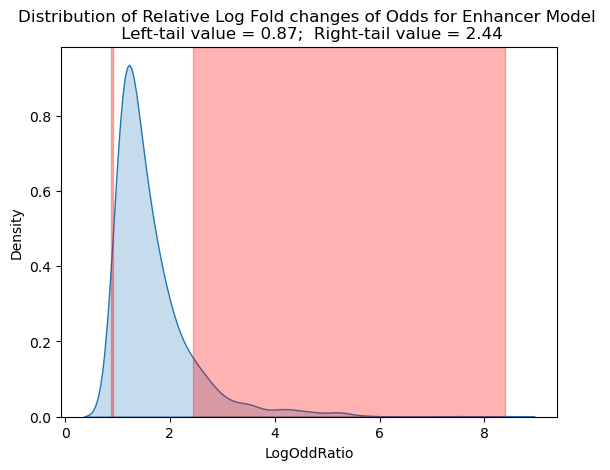

In [51]:
#print(z_score, p_value)
# Plot the distribution of 'LogOddRatio'

sns.kdeplot(df_interest['LogOddRatio'], fill=True, linewidth=1)

# # # Get the extreme values for a two tailed test at alpha = 0.05
# z_critical = norm.ppf(1 - 0.05/2) # two-tailed test at alpha = 0.05


# print(z_critical)
x1, x2 = mean + std, mean - std
# x1= 3.3219280948873626
# x2 =-3.3219280948873626
print(x2, x1)

# Shade the area for the two tailed test
plt.axvspan(min(df_interest['LogOddRatio']), x2, alpha=0.3, color='red')
plt.axvspan(x1, max(df_interest['LogOddRatio']), alpha=0.3, color='red')

# Add the observed z-score
# plt.text(-17, 0.5, f'Left-tail value = {x2:.2f}', color='blue', ha='left', va='center')
# plt.text(-3, 0.54, f'Right-tail value = {x1:.2f}', color='blue', ha='right', va='center')

plt.title(f'Distribution of Relative Log Fold changes of Odds for Enhancer Model \n Left-tail value = {x2:.2f};  Right-tail value = {x1:.2f}')
plt.savefig(output_path+ '/Enhancer_LogOddRatio_Distribution.png')
plt.show()

In [52]:
df_selected = df_interest[(df_interest['LogOddRatio']> x1)|(df_interest['LogOddRatio']<  x2)]

In [53]:
df_selected

,index,chr,Enhancer_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
114637,114637,chr2,199386624-199386823,rs1228159397,199386690,199386735,CGCAAGCGCGCGCGCGCGCGCGCGCGCACACACACACACACACAC,C,GTAACCCCAATTTGAAAAATGAGAAAAACTAGTGATGATTAAATTA...,GTAACCCCAATTTGAAAAATGAGAAAAACTAGTGATGATTAAATTA...,0.685392,0.283927,-0.275161,2.457963
225239,225239,chr2,46155743-46155942,rs141863156,46155812,46155819,ATTGGAG,NaN,CAAGTCCGTTCCCCCTGCTAACCTTTTCCATTTGAGTTACCTTTCT...,CAAGTCCGTTCCCCCTGCTAACCTTTTCCATTTGAGTTACCTTTCT...,0.944804,0.345473,-0.566249,5.019245
363580,363580,chr2,105316335-105316534,rs1407530549,105316438,105316467,GTGTGTGTGTGTGTGTGTGTGTGTGCGCG,G,TTTACAAAAAAAAAAAAAATTCCCCTACCTGATCCAGAGGAAAAAA...,TTTACAAAAAAAAAAAAAATTCCCCTACCTGATCCAGAGGAAAAAA...,0.864718,0.496976,-0.317993,2.693713
363581,363581,chr2,105316335-105316534,rs1346853910,105316440,105316471,GTGTGTGTGTGTGTGTGTGTGTGCGCGCGCG,G,TTTACAAAAAAAAAAAAAATTCCCCTACCTGATCCAGAGGAAAAAA...,TTTACAAAAAAAAAAAAAATTCCCCTACCTGATCCAGAGGAAAAAA...,0.864718,0.492185,-0.322137,2.721367
363582,363582,chr2,105316335-105316534,rs1303171089,105316440,105316473,GTGTGTGTGTGTGTGTGTGTGTGCGCGCGCGCG,G,TTTACAAAAAAAAAAAAAATTCCCCTACCTGATCCAGAGGAAAAAA...,TTTACAAAAAAAAAAAAAATTCCCCTACCTGATCCAGAGGAAAAAA...,0.864718,0.482145,-0.330818,2.779345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7439695,7439695,chr5,167991773-167991972,rs1783692307,167991843,167991933,TTTATCGAAAGACAGAGCTCTGGGTTTCAGTCCTCAGACAGTTGCT...,TT,AGGATTTCACGGGAGGTGAAAACGGAACAAGGGTCAGAGACAGTGT...,AGGATTTCACGGGAGGTGAAAACGGAACAAGGGTCAGAGACAGTGT...,0.556265,0.185175,-0.206424,2.463672
7519103,7519103,chr5,33451544-33451743,rs1741737899,33451594,33451625,GATCTCCTGACCTCGTGATCCACCCGCCTCG,G,TTGTATTTTTAGTAGAGACGGGGTTTCACTGTGTTAGCCAGGATGG...,TTGTATTTTTAGTAGAGACGGGGTTTCACTGTGTTAGCCAGGATGG...,0.887349,0.454877,-0.383754,3.238754
7523449,7523449,chr5,31960073-31960272,rs368844591,31960169,31960204,CTTTTCTTTCCTTCCTTCCTTTTCTTTCCTTCCTT,CTTTTCTTTCCTTCCTTCCTTTTCTTTCCTTCCTTCCTTTTCTTTC...,CAAAGACCCTGTTTCCAAACAAGGTCACATTCTGAGGTTTCAGGTG...,CAAAGACCCTGTTTCCAAACAAGGTCACATTCTGAGGTTTCAGGTG...,0.824073,0.349751,-0.390877,3.122464
7523476,7523476,chr5,31960073-31960272,rs1022872669,31960201,31960230,CTTTCCTTCCTTCTTTCCTTCCTTCTTTC,CTTTCCTTCCTTCTTTCCTTCCTTCTTTCCTTCCTTCTTTC,CAAAGACCCTGTTTCCAAACAAGGTCACATTCTGAGGTTTCAGGTG...,CAAAGACCCTGTTTCCAAACAAGGTCACATTCTGAGGTTTCAGGTG...,0.824073,0.409181,-0.341902,2.757778


In [54]:
len(df_selected['dbsnp_id'].unique())

142

In [55]:
len(df_selected['Enhancer_coordinates'].unique())

97

In [56]:
df_filtered = df_selected[(df_selected['ref_neucleotide'].str.len() < 20) & 
                          (df_selected['alternative_neucleotide'].str.len() < 20)]

In [57]:
df_filtered

,index,chr,Enhancer_coordinates,dbsnp_id,varinat_start,variant_end,ref_neucleotide,alternative_neucleotide,reference_seq,alt_seq,Ref_probab,Alt_probab,ScoreChange,LogOddRatio
913816,913816,chr19,50287269-50287468,rs2035928674,50287419,50287419,.,TTAATTATACTTTAA,CATTCACAGAACGTGAGGAGAATCTTCCATCCAGCACATGTGTTCA...,CATTCACAGAACGTGAGGAGAATCTTCCATCCAGCACATGTGTTCA...,0.849482,0.292088,-0.473497,3.773820
1056945,1056945,chr21,33493659-33493858,rs11298783,33493834,33493837,GGG,GG,CTTCCAGGCCCAGTAAGGTGCCTTATATCTCTCAATCTCATCCTTC...,CTTCCAGGCCCAGTAAGGTGCCTTATATCTCTCAATCTCATCCTTC...,0.831185,0.413594,-0.347096,2.803413
1365290,1365290,chr7,21708705-21708904,rs1318963939,21708871,21708872,A,T,TTCCTTGAACTTGCTCCCATCACGGGGCCTCAGCACCTCATGTTCC...,TTCCTTGAACTTGCTCCCATCACGGGGCCTCAGCACCTCATGTTCC...,0.803674,0.411779,-0.314957,2.547853
1431873,1431873,chr7,24061505-24061704,rs1782854324,24061653,24061664,AGCCCAAAAGC,AGC,ACCATGCCCGGCTAACTTTTTGTATTTTTAGTAGAGATGGGGTTTT...,ACCATGCCCGGCTAACTTTTTGTATTTTTAGTAGAGATGGGGTTTT...,0.914311,0.276027,-0.583589,4.806619
1658544,1658544,chr12,53399976-53400175,rs1938579082,53400164,53400165,G,T,GATGGTCTCAATCTCCTGACCTAGTGATCCACCTCCTGGGCCTCCC...,GATGGTCTCAATCTCCTGACCTAGTGATCCACCTCCTGGGCCTCCC...,0.813088,0.431580,-0.310199,2.518381
1764188,1764188,chr12,114002447-114002646,rs1873869549,114002542,114002543,C,A,CTCTTGGCTTGTTGATGGCCTCCTCCCTGTATCTTCACATGGTCAT...,CTCTTGGCTTGTTGATGGCCTCCTCCCTGTATCTTCACATGGTCAT...,0.821232,0.457204,-0.298952,2.447279
2247116,2247116,chr9,89159368-89159567,rs1826673935,89159538,89159544,AGTCAG,AG,ACAGTGGGATCACAACTGTTGAGGAAGTGAGAAATGTTTGGCTTGG...,ACAGTGGGATCACAACTGTTGAGGAAGTGAGAAATGTTTGGCTTGG...,0.829863,0.424518,-0.336381,2.725122
2747508,2747508,chr3,83580932-83581131,rs1371331343,83581047,83581063,GCCACTGCGCCCGGCC,GCC,TTTTTGTATTTTTAGTAGATTCGGGGTTTCGCCGTGTTAGCCAGGA...,TTTTTGTATTTTTAGTAGATTCGGGGTTTCGCCGTGTTAGCCAGGA...,0.777998,0.289075,-0.380382,3.107452
4323306,4323306,chr22,47552931-47553130,rs1601981311,47552973,47552976,CCC,CC,CACTGTGACCTGGAGAGGGCACAGGTCGTGCCTCCTCCGCATCCCT...,CACTGTGACCTGGAGAGGGCACAGGTCGTGCCTCCTCCGCATCCTC...,0.867178,0.428081,-0.380775,3.124761
4375886,4375886,chr22,21979879-21980078,rs540667407,21979941,21979943,AA,AACAAA,GCAGTGAGCCGAGATTGCGCCACTGCACTCCAGCCTGGGCGACAGA...,GCAGTGAGCCGAGATTGCGCCACTGCACTCCAGCCTGGGCGACAGA...,0.879388,0.478919,-0.352168,2.987859


In [62]:
df_filtered.to_csv(output_path+"/Enhancer_candidates_new.tsv", sep= "\t", index=False)
# Save to a .tsv file
np.savetxt(output_path+"/Unique_DBSNP_new.tsv", df_filtered['dbsnp_id'].unique(), delimiter="\t", fmt='%s')
#np.savetxt(output_path+"/Unique_Enhancers_new.tsv", df_filtered[['chr','Enhancer_coordinates']].unique(), delimiter="\t", fmt='%s')
df_filtered[['chr','Enhancer_coordinates']].drop_duplicates().to_csv(output_path + "/Unique_Enhancers_new.tsv", sep="\t", index=False)

In [42]:
df_selected.to_csv(output_path+"/Enhancer_candidates.tsv", sep= "\t", index=False)
# Save to a .tsv file
np.savetxt(output_path+"/Unique_DBSNP.tsv", df_selected['dbsnp_id'].unique(), delimiter="\t", fmt='%s')
np.savetxt(output_path+"/Unique_Enhancers.tsv", df_selected['Enhancer_coordinates'].unique(), delimiter="\t", fmt='%s')

KeyError: ('chr', 'Enhancer_coordinates')

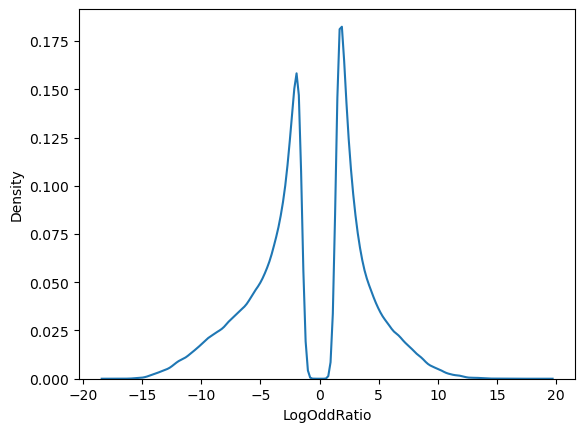

In [80]:
sns.kdeplot(df_interest['LogOddRatio'])
plt.show()


In [26]:
df_interest['reference_seq'].unique()

array(['GAGTGGAGCACTGTACATACCTGGCTGGATTGAGAATGGTAAGTAATTTGTAATAACATACCTGGCTTGTGCAAAAGCA',
       'AGATTTCACCTCTGCAAATATGAGAGATTCTGCAGAAGGTAAGCTTGTGATATTGGCTTGGTCTGAATTGGGTGTGTAT',
       'CTGGGTAATGCTGGTCACCAGCCTTGTGGCCCTTCAAGGTATGTCCAAAAGAGCCGTAAGCACCCCAAGCAATGAGGGT',
       'CTACTACTACTATTCTGCAAACGAGGAATTCAGACCAGGTAAGTACCCATGCGTCTCATTTTGGAGGAATAGGTTTAAA',
       'TCTCTCAGTGGTCGCTATCTGGAGGAGCTTAGCCAAAGGTAAGCTTTATTATGAATTAGCACAGTCAGCTTCACACAGT',
       'TCTGACCAGTGCTGCTGTGACGAATCTTTCAGTTACAGGTAAGCAGCTGCCAGGCCATGCACCTGCTGAGCACATGGGA',
       'GCTGAAAAATATTATGGCAACAAATGCATTATTCCATGGTAAGATACGTCTCATTATTGGAGTGTGTCTGAACATATAT',
       'CAGTATCTGATTTCCACCCAGTCAAAAAAATTGTCCAGGTAAGCACAATATCCCTATTTATTTTCAGTCCTACCTCAAG',
       'TTTGAAAACTTGTCTCCAGGAAGTGTTATTATATTCAGGTATGTTAATTGAGCTCAAACTGTTGACTTTACTTATATTT',
       'TCACATCCATCAGAGGATTGCTGATCACTCTTACCAAGGTATGTTTTATCACAGTGTTAAAAAGTACTGCTTATCATTT',
       'AACCAAATTTATATCTGCTTGGAACAACATGAAATATAGTAAGTATCATGTTTTAAAAATTGTATAAATCCAAAGAAAT',
       'AC

In [27]:
df_interest.groupby(['dbsnp_id', 'ref_neucleotide','alternative_neucleotide',  'reference_seq']).size()

dbsnp_id      ref_neucleotide                 alternative_neucleotide     reference_seq                                                                  
rs1057516984  TT                              TTT                         TTTGAAAACTTGTCTCCAGGAAGTGTTATTATATTCAGGTATGTTAATTGAGCTCAAACTGTTGACTTTACTTATATTT     7
rs10626387    T                               TCT                         AAAGACTTGTCATTTGATCCATGTTCAAGACCCTTGAGGTATTGTTTCATCATTTCTGTATTGTCTTTCAATAAAGAAA    15
rs10668386    .                               TC                          AAAGACTTGTCATTTGATCCATGTTCAAGACCCTTGAGGTATTGTTTCATCATTTCTGTATTGTCTTTCAATAAAGAAA    15
rs1158710364  TA                              TATA                        CTAACCATCATATTTAGAACCAGCTGTTTACCAGAGTGGTAAGTTGGATTGTGTTTTATTTTGGTTTTTATTCTTCATT     2
rs1172687424  G                               T                           CTACTACTACTATTCTGCAAACGAGGAATTCAGACCAGGTAAGTACCCATGCGTCTCATTTTGGAGGAATAGGTTTAAA     5
rs1197477113  .                               

In [28]:
df_interest.groupby(['dbsnp_id', 'ref_neucleotide','alternative_neucleotide']).size()

dbsnp_id      ref_neucleotide                 alternative_neucleotide   
rs1057516984  TT                              TTT                            7
rs10626387    T                               TCT                           15
rs10668386    .                               TC                            15
rs1158710364  TA                              TATA                           2
rs1172687424  G                               T                              5
rs1197477113  .                               AG                             6
rs1202559184  .                               CG                             5
rs1209017757  .                               A                              1
rs1212185079  TATTAT                          TAT                            2
rs1230423427  AA                              AAA                            1
rs1289052837  .                               C                              9
rs1297116846  A                               AA          

-0.267426781822307 0.7891405811788812


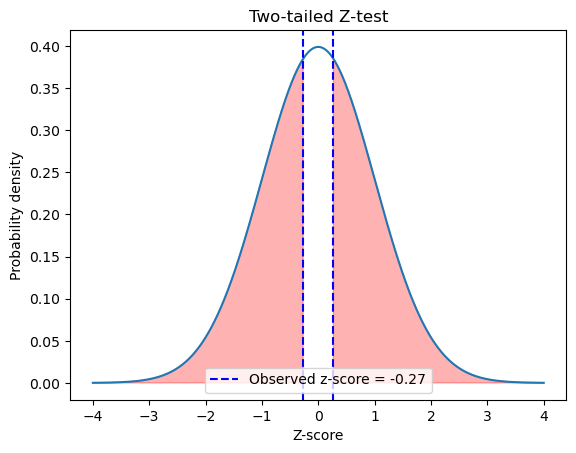

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

# Generate 1000 normally distributed data points
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)

# Perform the z test
z_score, p_value = ztest(x1= s, value = mu)

print(z_score, p_value)

# # Generate data and plot the normal distribution
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x, 0, 1)
plt.plot(x, y)

# Shade the two-tail regions
plt.fill_between(x, 0, y, where=(x <= -abs(z_score)) | (x >= abs(z_score)), color='red', alpha=0.3)

# # Mark the observed value
plt.axvline(z_score, color='blue', linestyle='--', label=f'Observed z-score = {z_score:.2f}')
plt.axvline(-z_score, color='blue', linestyle='--')

plt.legend()
plt.title('Two-tailed Z-test')
plt.xlabel('Z-score')
plt.ylabel('Probability density')
plt.show()

0.0 1.0
1.959963984540054
-1.9201628731122704 1.8585445470122721


/tmp/ipykernel_237056/578947367.py:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/shared/software/anaconda/anaconda3/lib/python3.10/site-packages/seaborn/distributions.py:2511: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




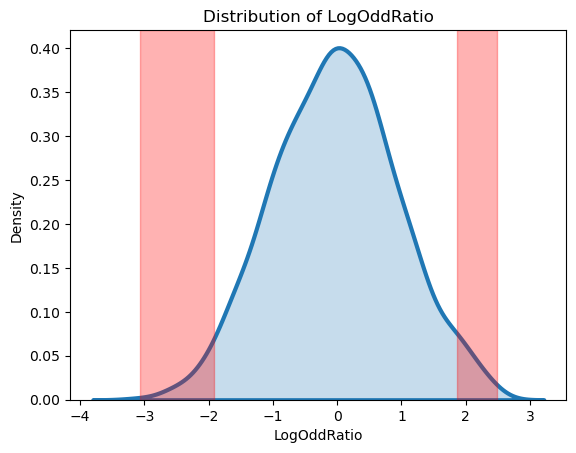

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from statsmodels.stats.weightstats import ztest

# Assume we have the following DataFrame
df = pd.DataFrame({
   'LogOddRatio': np.random.normal(0, 1, 1000)
})

# Perform the z test
z_score, p_value = ztest(x1= df['LogOddRatio'], value =  df['LogOddRatio'].mean())
print(z_score, p_value)
# Plot the distribution of 'LogOddRatio'
sns.distplot(df['LogOddRatio'], hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 3})

# Get the extreme values for a two tailed test at alpha = 0.05
z_critical = norm.ppf(1 - 0.05/2) # two-tailed test at alpha = 0.05


print(z_critical)
x1, x2 = df['LogOddRatio'].mean() + z_critical*df['LogOddRatio'].std(), df['LogOddRatio'].mean() - z_critical*df['LogOddRatio'].std()
print(x2, x1)
# Shade the area for the two tailed test
plt.axvspan(min(df['LogOddRatio']), x2, alpha=0.3, color='red')
plt.axvspan(x1, max(df['LogOddRatio']), alpha=0.3, color='red')

plt.title('Distribution of LogOddRatio')
plt.show()
